<a href="https://colab.research.google.com/github/gutiel2/Machine-Learning-Engineering/blob/main/MLE_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Mateo Gutierrez
RIN: 662006635
MLE - HW 4
"""

In [5]:
# Importing Dependenciesimport numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


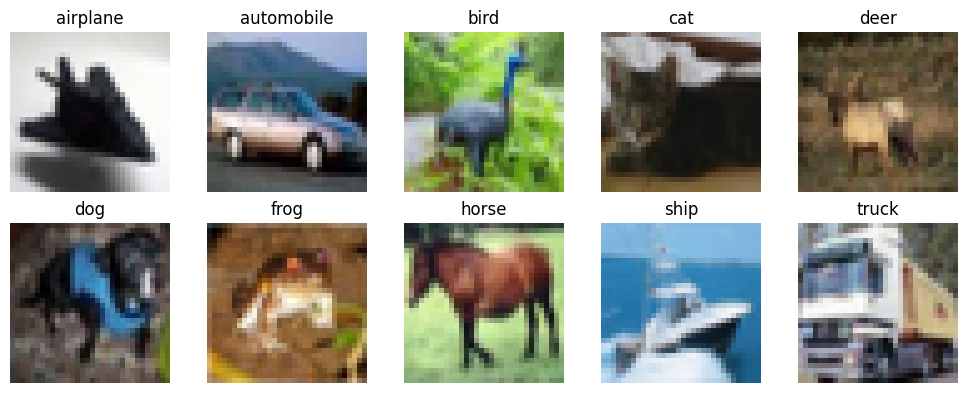

In [6]:
# Question 1a

# CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Converting to 1d arrays
y_train_full = y_train_full.reshape(-1,)
y_test = y_test.reshape(-1,)

print("Train images shape:", x_train_full.shape)
print("Train labels shape:", y_train_full.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Displaying one example image from each class
fig, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.ravel()

for i in range(10):
    idx = np.where(y_train_full == i)[0][0]
    axes[i].imshow(x_train_full[idx])
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Training set shape: (35000, 32, 32, 3)
Validation set shape: (15000, 32, 32, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.2709 - loss: 2.0333 - val_accuracy: 0.3266 - val_loss: 1.8504
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.3695 - loss: 1.7642 - val_accuracy: 0.3826 - val_loss: 1.6968
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.4045 - loss: 1.6678 - val_accuracy: 0.4105 - val_loss: 1.6567
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.4210 - loss: 1.6080 - val_accuracy: 0.4309 - val_loss: 1.5991
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.4500 - loss: 1.5483 - val_accuracy: 0.4275 - val_loss: 1.5911
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.4581 - loss: 1.5151 - val_accuracy: 0.4567 - val_loss: 1.5111
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4723 - loss: 1.4828 - val_accuracy: 0.4588 - val_loss: 1.5123
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4808 - loss: 1.4472 - 

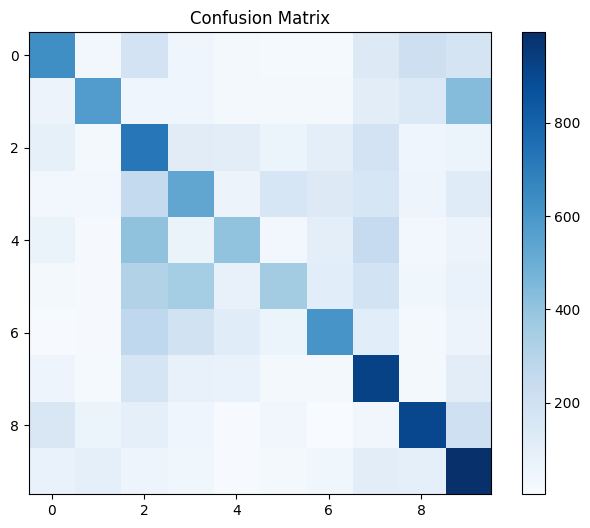

Test accuracy (best model): 0.4418


In [7]:
# Question 1b

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full,
    test_size=0.3,
    random_state=42,
    shuffle=True
)

print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
def create_baseline_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))   # 10 classes
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = create_baseline_model()
baseline_model.summary()

# Training the baseline model
history_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate on the validation set
val_loss, val_acc = baseline_model.evaluate(x_val, y_val, verbose=0)
print(f"Validation accuracy (baseline): {val_acc:.4f}")

# Evaluating on test set
test_loss, test_acc = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy (baseline): {test_acc:.4f}")

from itertools import product

# Hyperparameters to try
dense_units_options = [128, 256]
learning_rate_options = [1e-3, 1e-4]
batch_size_options = [32, 64]

best_acc = 0.0
best_params = None
best_model = None

for units, lr, bs in product(dense_units_options, learning_rate_options, batch_size_options):
    print(f"Testing units={units}, lr={lr}, batch_size={bs}")

    # Build a model
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(units // 2, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train,
              epochs=5,
              batch_size=bs,
              validation_data=(x_val, y_val),
              verbose=0)

    # Evaluating
    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
    print(f"Validation accuracy = {val_acc:.4f}\n")

    if val_acc > best_acc:
        best_acc = val_acc
        best_params = (units, lr, bs)
        best_model = model

print("Best validation accuracy:", best_acc)
print("Best hyperparameters: units={}, lr={}, batch_size={}".format(*best_params))

# Prediction on validation set
y_val_pred = np.argmax(best_model.predict(x_val), axis=1)

print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy (best model): {test_acc:.4f}")

Mounted at /content/drive

Basic Statistics:
          Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
count   1503.000000      1503.000000   1503.000000           1503.000000   
mean    2886.380572         6.782302      0.136548             50.860745   
std     3152.573137         5.918128      0.093541             15.572784   
min      200.000000         0.000000      0.025400             31.700000   
25%      800.000000         2.000000      0.050800             39.600000   
50%     1600.000000         5.400000      0.101600             39.600000   
75%     4000.000000         9.900000      0.228600             71.300000   
max    20000.000000        22.200000      0.304800             71.300000   

       Suction_side_displacement_thickness  Scaled_sound_pressure_level  
count                          1503.000000                  1503.000000  
mean                              0.011140                   124.835943  
std                               0.013150      

<ipython-input-15-3ea81b40a150>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


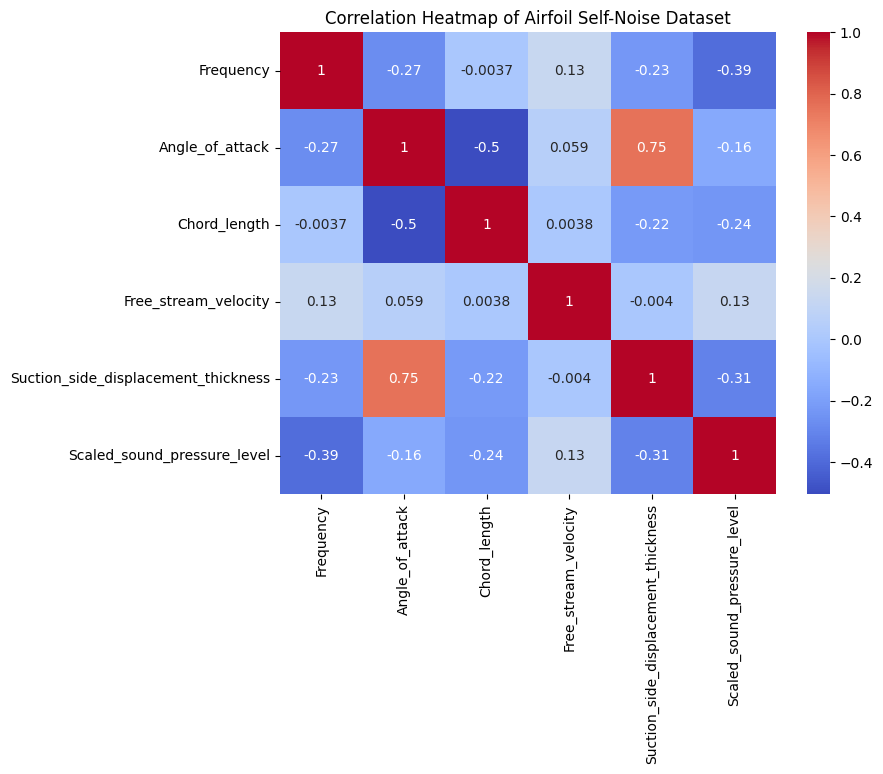


X_train shape: (1052, 5), X_test shape: (451, 5)
y_train shape: (1052,), y_test shape: (451,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 15578.2031
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15106.2363
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 14043.5312
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 11991.5117
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8925.5459
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5375.7163 
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2668.9524
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1133.0192
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 673.0464
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 510.8093
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 466.2390
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 431.4354
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 396.5832
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335.7570
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━

In [15]:
# Question 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import seaborn as sns

drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Colab/' + 'airfoil_self_noise.dat'

# Defining column names
column_names = [
    "Frequency",
    "Angle_of_attack",
    "Chord_length",
    "Free_stream_velocity",
    "Suction_side_displacement_thickness",
    "Scaled_sound_pressure_level"
]

df = pd.read_csv(
    file_path,
    delim_whitespace=True,
    header=None,
    names=column_names
)

print("\nBasic Statistics:")
print(df.describe())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Airfoil Self-Noise Dataset")
plt.show()
X = df.drop("Scaled_sound_pressure_level", axis=1)
y = df["Scaled_sound_pressure_level"]

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building model
def create_regression_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

model_reg = create_regression_model(input_dim=X_train_scaled.shape[1])
model_reg.summary()

# Training
history_reg = model_reg.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

y_pred = model_reg.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE on Test: {mse:.4f}")
print(f"R^2 on Test: {r2:.4f}")